In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df= pd.read_csv('C:/Users/Rigua/OneDrive/Documents/freecodecamp/proyectos/medical_examination.csv',
               index_col= 0)

In [5]:
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,glu,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
#Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing
#their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. 
#Use the value 0 for NOT overweight and the value 1 for overweight.
df['overweight']= np.where((df['weight']/ (df['height'] ** 2) * 10000) > 25,1,0)

In [7]:
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,glu,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [9]:
#Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, 
#make the value 0. If the value is more than 1, make the value 1.
df['cholesterol']=np.where(df['cholesterol'] ==1,0,1)
df['glu']=np.where(df['glu'] ==1,0,1)

In [49]:
# Draw Categorical Plot
#def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df,id_vars=['cardio'],value_vars=['cholesterol','glu','smoke','alco','active','overweight'])
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one 
#of the columns for the catplot to work correctly.
df_cat['total'] = 0
df_cat=df_cat.groupby(['cardio','variable','value'],as_index = False).count()
df_cat.head()

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,5691


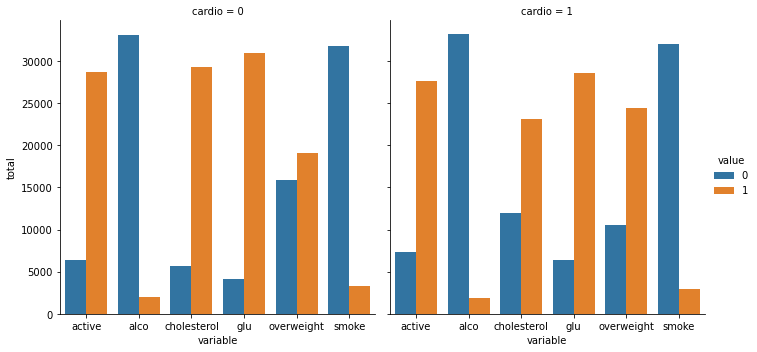

In [53]:
# Draw the catplot with 'sns.catplot()
fig = sns.catplot(x='variable',y='total',hue='value',kind='bar', data=df_cat,col='cardio')

In [ ]:
# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = None

    # Calculate the correlation matrix
    corr = None

    # Generate a mask for the upper triangle
    mask = None
